In [33]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Project for DATA 118 - Winter 2025

Welcome to your project for DATA 118. This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing (including any use of generative AI, but AI should not be used for general coding in this class). The score will be based on:
-  Clarity and soundness of the arguments and conclusions;
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the data vizualizations, summaries used, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.




### The Data

Option 1: You are welcome to find your own data set for this project, but keep the goals in mind. Here are some suggested sources.

Suggestions for datasets 
- Github Collection of publicly available data: https://github.com/awesomedata/awesome-public-datasets
- Google Dataset search: https://datasetsearch.research.google.com/
- CDC: https://data.cdc.gov/browse
- 500 cities: https://www.cdc.gov/500cities/index.htm
- UN: http://data.un.org/
- Kaggle: https://www.kaggle.com/datasets
- FEC: https://www.fec.gov/
- FiveThirtyEight: https://github.com/fivethirtyeight/data



Option 2:

Use data from the "National Wellbeing Survey, United States, 2021",

*"The National Wellbeing Survey (NWS) is a population-based survey on the wellbeing of adults aged 18 to 64 in the United States. Specific survey domains include psychological well-being, social relationships and support, physical health, mental health, health behaviors, COVID-19 experiences and impacts, socioeconomic measures, political orientation, and demographic measures."*

The data can be downloaded from the link below
https://www.icpsr.umich.edu/web/ICPSR/studies/38879/


   First, Click on 'Download' and then 'Delimited'.

   Next, you will need to make an account and agree to the corresponding terms and conditions to have access to the data. Note you will get a folder called "ICPSR_38879". This folder contains the codebook that describes the study and the variables in detail. It has information on the survey that was administered. This folder is also how you will get the data itself.

A few notes, hints, that may be helpful as you are working with this data.
1. Take a look at the codebook. It has a lot of information about the survey itself and the variable names. We have put together a spreadsheet of selected variables to make it easier to see the variables present.
2. The variable outcomes are encoded as numeric values. To see the corresponding outputs, you will need to look at  the codebook, including how missing data was handled in the survey.



### The Report 

You must submit four files broken into 2 parts:

Part 1: **Due Sunday February 16 at 11:59pm**

1. The file you plan to use for your project. 

2. The introduction of the report. 

   A.  **Introduce the dataset**.  Describe the data. What is the being studied? Where does it come from? Why was it collected (what are the researchers interested in studying)?Was it an experiment? A retrospective observational study? A prospective observational study? How many variables are there in the full dataset? List a few. How many observations (i.e. rows)? Describe the sampling process. Using what you have learned about data collection is this a biased or unbiased sample? Why?


Part 2: **Due Saturday March 8 at 11:59pm**

1. The Jupyter Notebook that contains all the code you use for the analysis broken into the parts listed below as necessary. Make sure to RUN ALL CELLS IN YOUR NOTEBOOK before submitting.

2. A report of your findings. **This report should be at most 4 pages (12 pt font 1.5 spaced) long including references.** Use data visualization and data summaries to justify your conclusions. Note that the page limitation means you will not show all analyses you will make - select carefully what you think is most relevant.

   The report should address the following points broken into parts:

    A. Same as above, but edited based on feedback.

    B.  **Characteristics of sample**. Describe the unit (people, airbnbs, specific animals, etc) sampled in the dataset.  Summarize the distributions or ranges of 3 or more of the characteristics (variables). You should include a graph or table for each distribution. You should create at least one graph and at least one table (DataFrame).

    C. **Relationships between variables.**  Now, shift focus from distributions of single variables to relationships between variables. Include two or more graphs or tables here that highlight interesting relationships between variables.

    During your exploration you should create at least one new column in the DataFrame based on existing variables in the dataset. To do this, you need to write a function (or more than one if you like) and apply it to one or more columns of the dataset. Make sure to clearly mark in your code notebook where your function is located.

    D. **Provide context and set up a Hypothesis Test.** To the best of your knowledge, what do you think the relationships you discovered imply?

    Based on supporting evidence from your investigation, set up a hypothesis test centering around a question of interest. Formulate the hypothesis test by **clearly stating the null and alternate hypothesis, and the corresponding test statistic.** You are just setting up the hypothesis test here, **you do not need to carry out the hypothesis test**.

    E. **Conclusion/Self-Assessment.** What did you learn from exploring this dataset? If you were to continue this project, what is one question you would want to continue to investigate?


Your submission is to be uploaded to Canvas and Gradescope. **If you do not submit all four files you will automatically recieve a deduction of 20 points from your submission.**
There are some minimum requirements for your submission:

1. Upload your data to Canvas
2. Upload Part A: Introdcution to the data set as a PDF to Canvas
3. Upload your final report as a PDF to Canvas
4. Upload the jupyter notebook containing your analysis code to Gradescope, in .ipynb format.
5. The report should be 4 pages maximum, , contain no code, and including tables and figures.
6. You must have a bibliography citing the dataset. This can be on a separate page.
7. If your report uses additional outside results and/or data, proper citations must be provided.
    

You may use the following code to help you load in the data.

In [34]:
crimes_no_zip = pd.read_csv("chicagocrime.csv")
zipcodes_df = gpd.read_file("chizipcodes.csv")
income_df = pd.read_excel("illinoisincome.xlsx")

In [35]:
display(crimes_no_zip.head())
display(zipcodes_df.head())
display(income.head())

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11938228,JD100017,12/31/2019 11:55:00 PM,0000X W 69TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,6.0,69,15,1176896.0,1859260.0,2019,01/07/2020 06:57:13 PM,41.769150,-87.627137,"(41.769150218, -87.627136786)"
1,11940078,JD100016,12/31/2019 11:54:00 PM,063XX S MAY ST,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,16.0,68,04B,1169736.0,1862855.0,2019,01/08/2020 03:45:22 PM,41.779174,-87.653278,"(41.779173667, -87.653277703)"
2,11938857,JD100599,12/31/2019 11:50:00 PM,004XX N Ashland ave,0820,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,...,27.0,24,06,NaN,NaN,2019,01/07/2020 06:57:13 PM,NaN,NaN,NaN
3,11938240,JD100002,12/31/2019 11:48:00 PM,004XX S CICERO AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,VEHICLE NON-COMMERCIAL,True,False,...,29.0,25,15,1144466.0,1897452.0,2019,01/07/2020 06:57:13 PM,41.874624,-87.745053,"(41.874623951, -87.745052647)"
4,11937967,JC567053,12/31/2019 11:46:00 PM,034XX W JACKSON BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,...,28.0,27,15,1153587.0,1898480.0,2019,01/07/2020 06:57:13 PM,41.877268,-87.711537,"(41.877268465, -87.711536692)"


,the_geom,OBJECTID,ZIP,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.67762151065281 41.91775780...,33,60647,106052287.488,42720.0444058
1,MULTIPOLYGON (((-87.72683253163021 41.92264626...,34,60639,127476050.762,48103.7827213
2,MULTIPOLYGON (((-87.78500237831095 41.90914785...,35,60707,45069038.4783,27288.6096123
3,MULTIPOLYGON (((-87.6670686895295 41.888851884...,36,60622,70853834.3797,42527.9896789
4,MULTIPOLYGON (((-87.70655631674127 41.89555340...,37,60651,99039621.2518,47970.1401531


,ZIP,Average Income
0,0,81382.26
1,60002,85588.75
2,60004,116373.77
3,60005,103521.76
4,60007,77200.16


# Code for Part A

A lot of cleaning needs to be done on the data in order for it to be usable. First I will map ZIP codes for each crime using the coordiates given in the dataset with geopandas.

In [36]:
zipcodes_df['geometry'] = zipcodes_df['the_geom'].apply(wkt.loads)
zipcodes = gpd.GeoDataFrame(zipcodes_df, geometry='geometry', crs="EPSG:4326")

crimes_clean = crimes_no_zip.dropna(subset=['Longitude', 'Latitude']).copy()
crimes_clean['geometry'] = crimes_clean.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
crimes_gdf = gpd.GeoDataFrame(crimes_clean, geometry='geometry', crs="EPSG:4326")

crimes_zip = gpd.sjoin(crimes_gdf, zipcodes, how="left", predicate="within").filter(["Primary Type", "Arrest", "ZIP"])


Next I will eliminate irrelevent columns and isolate only violent crimes and list the counts of each offense as well as the zip codes in order of frequency. See the documentation for the definition of a violent crime.

In [50]:
crimes = crimes_zip[crimes_zip["Primary Type"].isin(["ASSAULT", "BATTERY", "CRIMINAL SEXUAL ASSAULT", 
                                             "SEX OFFENSE", "HOMICIDE", "ROBBERY", "CRIM SEXUAL ASSAULT", "KIDNAPPING", 
                                             "INTIMIDATION", "STALKING", "HUMAN TRAFFICKING"])].drop(columns="Arrest")
display(crimes.head(10))

type_counts = crimes["Primary Type"].value_counts().to_frame()
zip_freqs = crimes["ZIP"].astype(str).value_counts().to_frame()

display(type_counts.head(10))
display(zip_freqs.head(10))

,Primary Type,ZIP
1,BATTERY,60621
6,BATTERY,60609
7,ASSAULT,60625
10,BATTERY,60649
11,BATTERY,60621
12,BATTERY,60611
14,BATTERY,60623
15,BATTERY,60617
16,BATTERY,60628
18,BATTERY,60619


,count
Primary Type,
BATTERY,49474
ASSAULT,20601
ROBBERY,7989
SEX OFFENSE,1320
CRIM SEXUAL ASSAULT,902
CRIMINAL SEXUAL ASSAULT,682
HOMICIDE,509
STALKING,224
KIDNAPPING,172


,count
ZIP,
60620,4482
60619,3919
60623,3737
60624,3719
60644,3709
60628,3588
60617,3074
60621,3019
60636,2959


Next I will clean and strip the income data and find average total income in US Dollars for each ZIP code.

In [45]:
income = income_df.iloc[:, [0, 18, 19]]
income.columns = ["ZIP", "Number of Returns", "Amount"]
income = income[pd.to_numeric(income["ZIP"], errors='coerce').notnull()]

income["Number of Returns"] = pd.to_numeric(income["Number of Returns"], errors='coerce')
income["Amount"] = pd.to_numeric(income["Amount"], errors='coerce')
income = income.groupby("ZIP", as_index=False).sum()

income["Average Total Income (USD)"] = round(1000 * (income["Amount"] / income["Number of Returns"]), 2)
income = income.drop(columns=["Number of Returns", "Amount"])
income["ZIP"] = income["ZIP"].astype(str)

income.head(10)

,ZIP,Average Total Income (USD)
0,0,81382.26
1,60002,85588.75
2,60004,116373.77
3,60005,103521.76
4,60007,77200.16
5,60008,68199.05
6,60010,250031.66
7,60012,126237.08
8,60013,92870.88
9,60014,84711.74


Last I will combine the crime and income dataframes into one (by zip code) so it can undergo analysis and plot a preliminary dot plot graph.

,Zip Code,Number of Violent Crimes,Average total Income
0,60620,4482,39602.60
1,60619,3919,38755.83
2,60623,3737,34484.76
3,60624,3719,32872.88
4,60644,3709,37503.92
5,60628,3588,39684.09
6,60617,3074,41230.43
7,60621,3019,26865.14
8,60636,2959,27860.99
9,60637,2937,60986.17


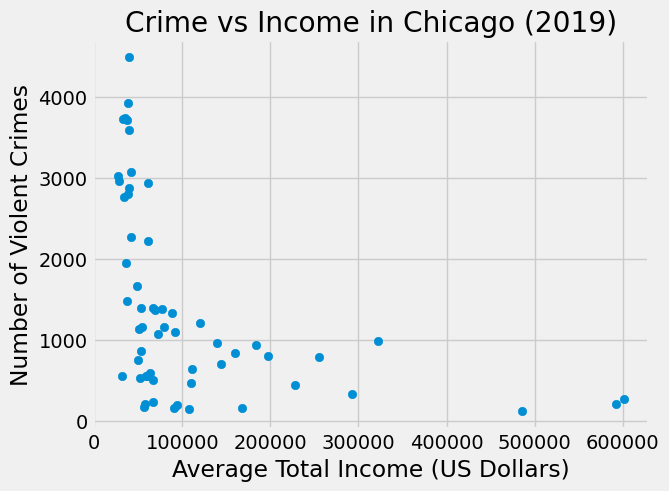

In [65]:
crime_vs_income = pd.merge(zip_freqs, income, on="ZIP", how="left")
crime_vs_income.columns = ["Zip Code", "Number of Violent Crimes", "Average total Income"]
crime_vs_income.set_index(crime_vs_income["Zip Code"])

plt.scatter(crime_vs_income["Average total Income"], crime_vs_income["Number of Violent Crimes"])
plt.xlabel("Average Total Income (US Dollars)")
plt.ylabel("Number of Violent Crimes")
plt.title("Crime vs Income in Chicago (2019)")

display(crime_vs_income.head(10))
plt.show()

# Code for Part B

# Code for Part C

# Code for Part D (if any)